In [150]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [80]:
wids = pd.read_csv("training_v2.csv")
cols = ['patient_id','hospital_id','hospital_death','age','bmi','elective_surgery','ethnicity','gender','height',
                   'hospital_admit_source','icu_admit_source','icu_id','icu_stay_type','icu_type',
                   'pre_icu_los_days','readmission_status','weight','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min',
                   'h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max',
                  'h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max',
                  'h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min']

In [186]:
def avg_h1_cols(df):
    avg_h1_list = ['h1_diasbp', 'h1_heartrate', 'h1_mbp', 'h1_resprate', 'h1_spo2', 'h1_sysbp',
                        'h1_temp', 'h1_albumin', 'h1_bilirubin', 'h1_bun', 'h1_calcium', 'h1_creatinine',
                        'h1_glucose', 'h1_hco3', 'h1_hemaglobin', 'h1_hematocrit', 'h1_inr', 'h1_lactate', 
                        'h1_platelets', 'h1_potassium', 'h1_sodium', 'h1_wbc', 'h1_arterial_pco2', 
                        'h1_arterial_ph', 'h1_arterial_po2', 'h1_pao2fio2ratio']
    avg_h1_data = pd.DataFrame()
    for col in avg_h1_list:
        avg_h1_data[col + '_avg'] = df[[col + '_min', col + '_max']].mean(axis=1)
    return(avg_h1_data) 

In [187]:
avg_h1_cols(wids).shape

(91713, 26)

In [188]:
def diff_h1d1_cols(df):
    diff_h1d1_list = ['h1_diasbp', 'h1_heartrate', 'h1_mbp', 'h1_resprate', 'h1_spo2', 'h1_sysbp',
                        'h1_temp', 'h1_albumin', 'h1_bilirubin', 'h1_bun', 'h1_calcium', 'h1_creatinine',
                        'h1_glucose', 'h1_hco3', 'h1_hemaglobin', 'h1_hematocrit', 'h1_inr', 'h1_lactate', 
                        'h1_platelets', 'h1_potassium', 'h1_sodium', 'h1_wbc', 'h1_arterial_pco2', 
                        'h1_arterial_ph', 'h1_arterial_po2', 'h1_pao2fio2ratio', 'd1_diasbp','d1_heartrate',
                        'd1_mbp','d1_resprate','d1_spo2', 'd1_sysbp', 'd1_temp', 'd1_albumin',
                        'd1_bilirubin', 'd1_bun', 'd1_calcium', 'd1_creatinine', 'd1_glucose', 'd1_hco3',
                        'd1_hemaglobin', 'd1_hematocrit', 'd1_inr', 'd1_lactate', 'd1_platelets', 'd1_potassium',
                        'd1_sodium', 'd1_wbc', 'd1_arterial_pco2', 'd1_arterial_ph', 'd1_arterial_po2', 'd1_pao2fio2ratio']
    diff_h1d1_data = pd.DataFrame()
    for col in diff_h1d1_list:
        diff_h1d1_data[col + '_diff'] = df[col + '_max'] - df[col + '_min']
    return(diff_h1d1_data) 

In [190]:
diff_h1d1_cols(wids).shape

(91713, 52)

In [191]:
def med_diff_cols(df):
    h1d1_list = ['diasbp', 'heartrate', 'mbp', 'resprate', 'spo2', 'sysbp', 'temp', 'albumin', 'bilirubin', 'bun',
                 'calcium', 'creatinine', 'glucose', 'hco3', 'hemaglobin', 'hematocrit', 'inr', 'lactate', 'platelets',
                 'potassium', 'sodium', 'wbc', 'arterial_pco2', 'arterial_ph', 'arterial_po2', 'pao2fio2ratio']
    med_diff_data = pd.DataFrame()
    for col in h1d1_list:
        med_diff_data[col + 'med_diff'] = ((df[['d1_' + col + '_min', 'd1_' + col + '_max']].median(axis=1)) - df[['h1_' + col + '_min', 'h1_' + col + '_max']].median(axis=1))
    return(med_diff_data)

In [192]:
med_diff_cols(wids).shape

(91713, 26)

In [194]:
def h1_ppv(df):
    '''
    Creates column with the h1 blood pressure ratio (sys / dias)

    Parameters:
    -----------------------------
    df                pd.DataFrame

    Return:
    -----------------------------
    h1_ppv         pd.DataFrame

    '''
    h1_ppv = pd.DataFrame()
    h1_ppv['h1_ppv'] = (df[['h1_sysbp_max', 'h1_sysbp_min']].median(axis=1)) / (df[['h1_diasbp_max', 'h1_diasbp_min']].median(axis=1))
    return(h1_ppv)

In [195]:
h1_ppv(wids).shape

(91713, 1)

In [196]:
def d1_ppv(df):
    '''
    Creates column with the d1 blood pressure ratio (sys / dias)

    Parameters:
    -----------------------------
    df                pd.DataFrame

    Return:
    -----------------------------
    d1_ppv         pd.DataFrame

    '''
    d1_ppv = pd.DataFrame()
    d1_ppv['d1_ppv'] = (df[['d1_sysbp_max', 'd1_sysbp_min']].median(axis=1)) / (df[['d1_diasbp_max', 'd1_diasbp_min']].median(axis=1))
    return(d1_ppv)

In [198]:
d1_ppv(wids).shape

(91713, 1)

### Imputing Null Values

In [157]:
wids = pd.read_csv("training_v2.csv")
cols = ['h1_creatinine_max','h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
        'h1_hemaglobin_max','h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
        'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min',
        'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 
        'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
        'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
        'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']

In [158]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [159]:
null_values(wids[cols])

Dataframe has 38 columns.
There are 38 columns that have missing values.


,Missing Values,Percent of Total Values
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3
h1_hco3_min,76094,83.0
h1_hco3_max,76094,83.0
h1_arterial_pco2_min,75959,82.8
h1_arterial_pco2_max,75959,82.8


In [160]:
h1_subset = wids[cols]
h1_subset.head()

,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,...,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,...,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,11.6,11.6,34.0,34.0,...,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


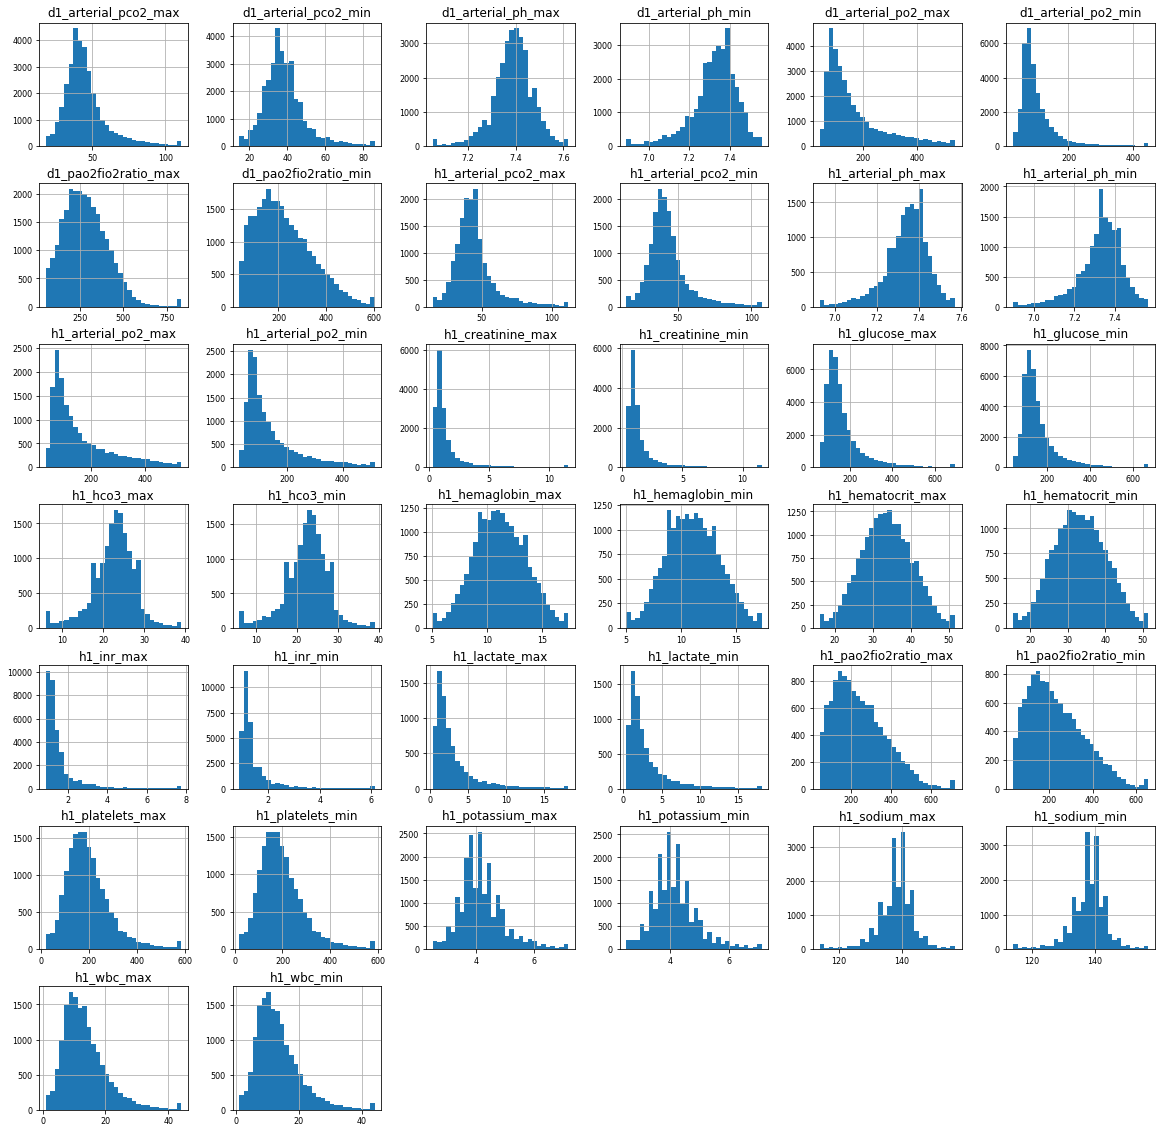

In [161]:
h1_subset.hist(figsize=(20, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

In [162]:
# Simple imputing using plots above:
# Impute using median: 'h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min', 'h1_inr_max',
#                  'h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max',
#                  'h1_wbc_max','h1_wbc_min' 
#                  'h1_potassium_min'
# Impute using mean: 'h1_hco3_max','h1_hco3_min', 'h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
#                  'h1_hematocrit_min','h1_sodium_max','h1_sodium_min'

In [163]:
men_wids = wids[wids['gender'] == 'M']
women_wids = wids[wids['gender'] == 'F']

In [164]:
men_wids.shape

(49469, 186)

In [165]:
women_wids.shape

(42219, 186)

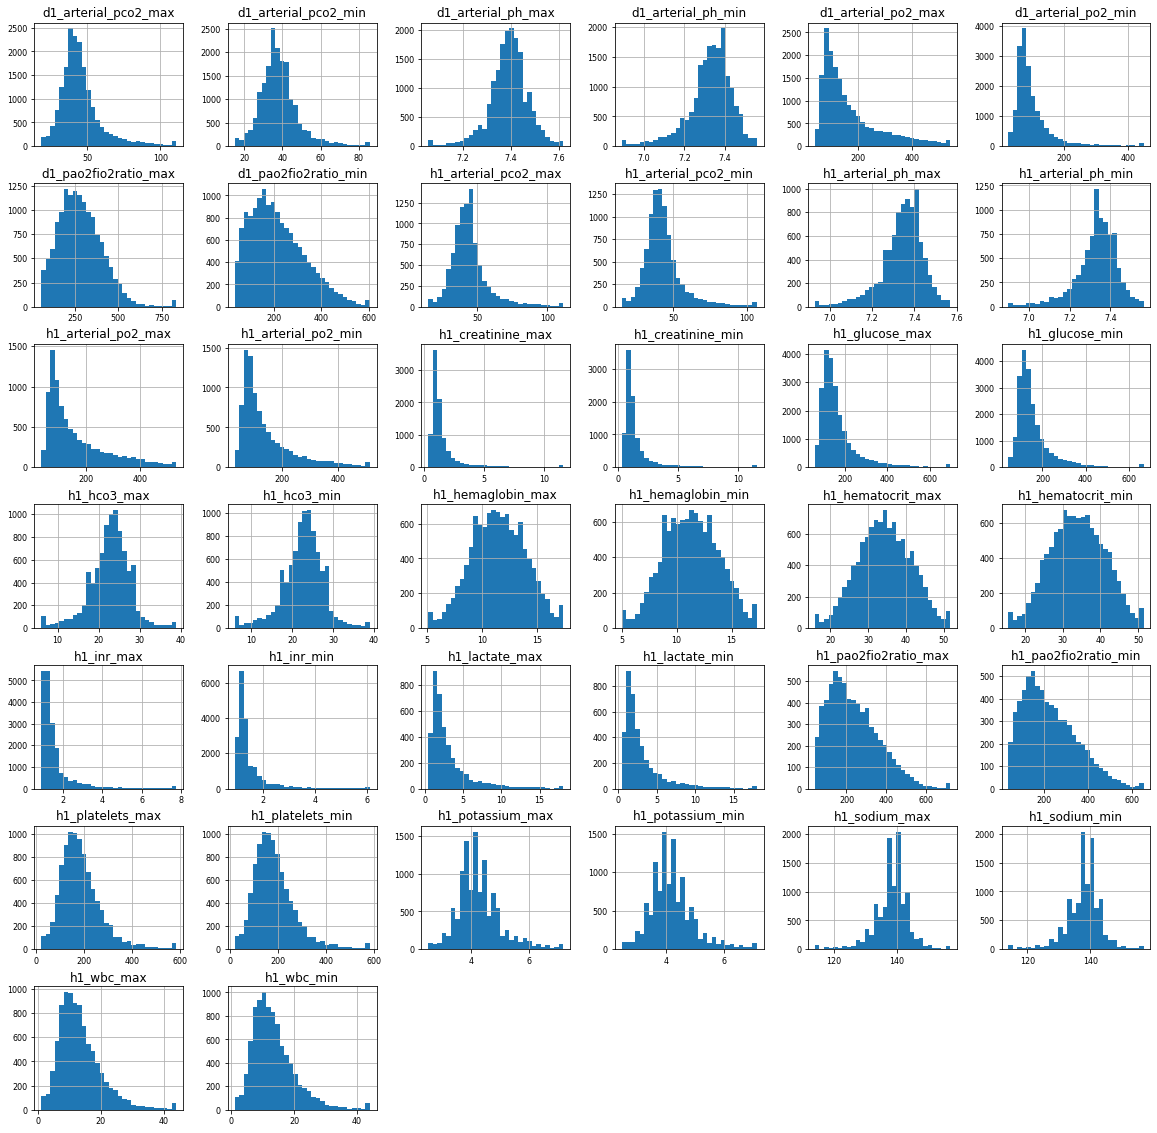

In [166]:
men_wids[cols].hist(figsize=(20, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

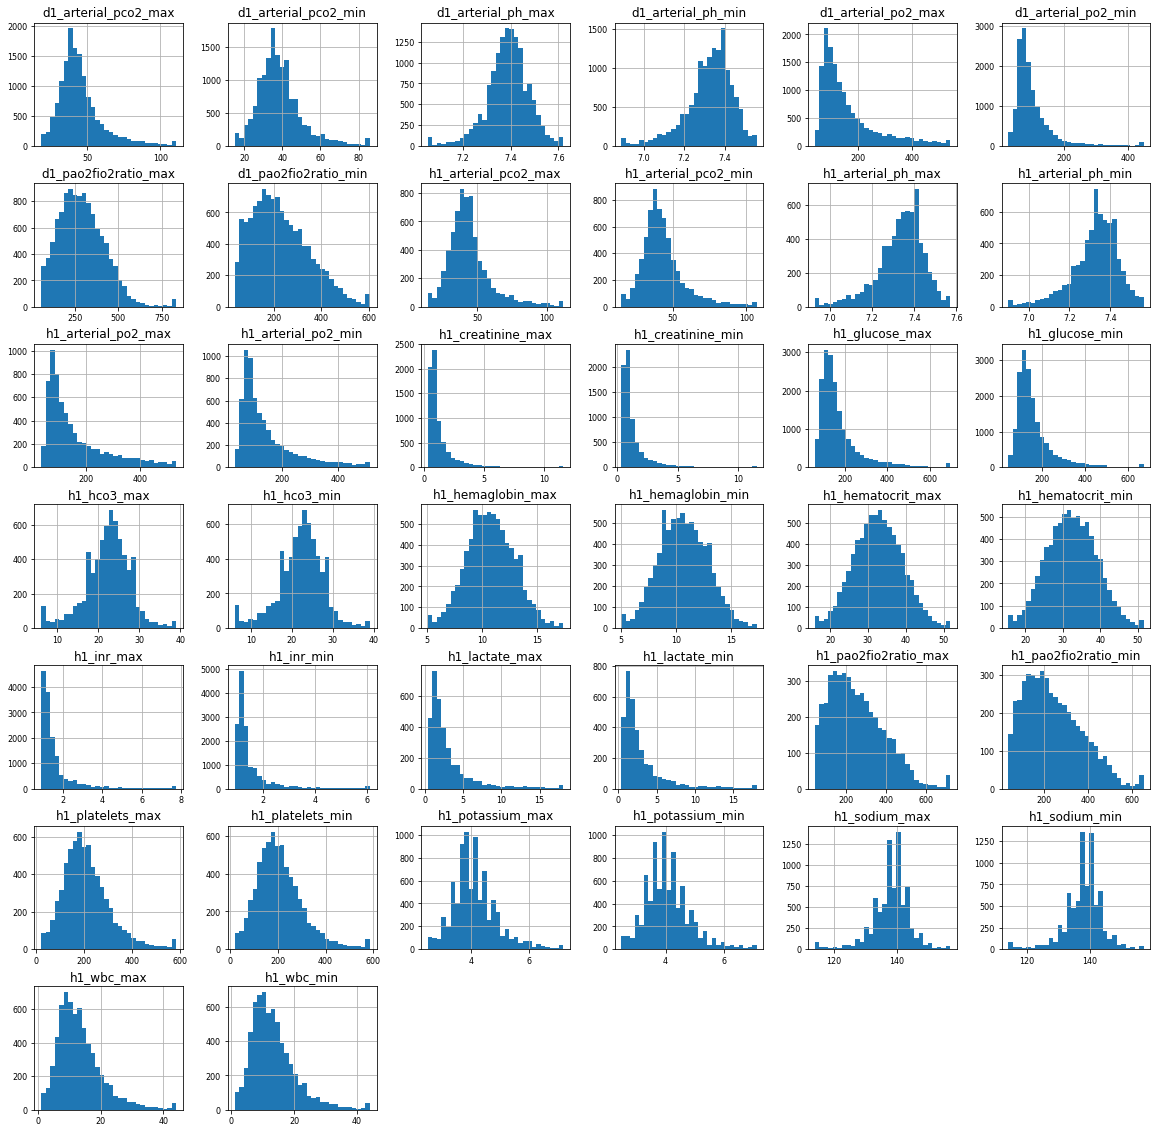

In [167]:
women_wids[cols].hist(figsize=(20, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

##### No need to impute based on gender alone - distributions not changing drastically

In [168]:
alive_wids = wids[wids['hospital_death'] == 0]
alive_wids.shape

(83798, 186)

In [169]:
dead_wids = wids[wids['hospital_death'] == 1]
dead_wids.shape

(7915, 186)

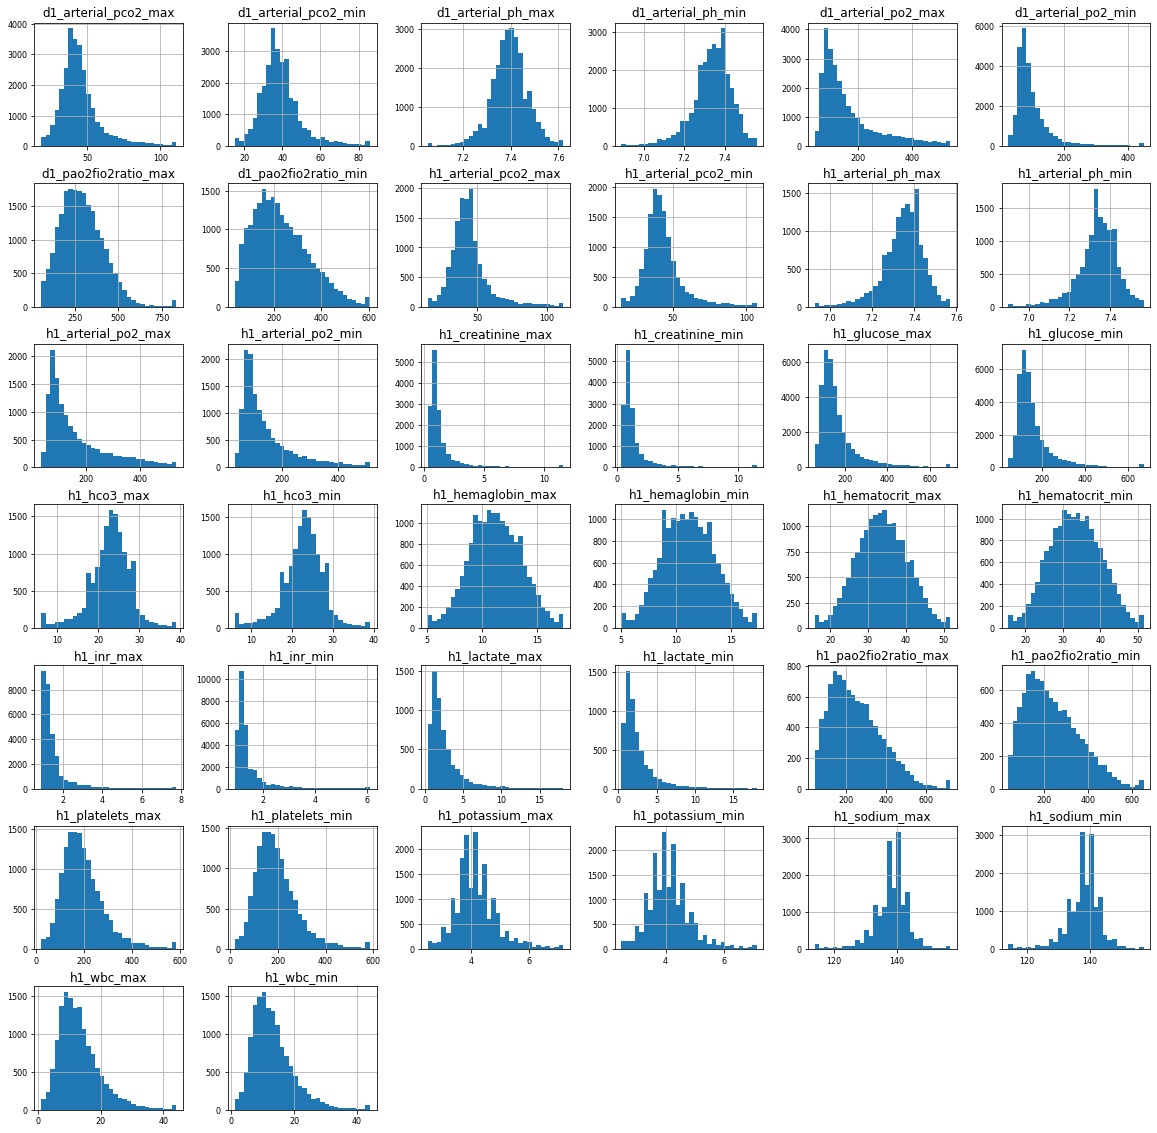

In [170]:
alive_wids[cols].hist(figsize=(20, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

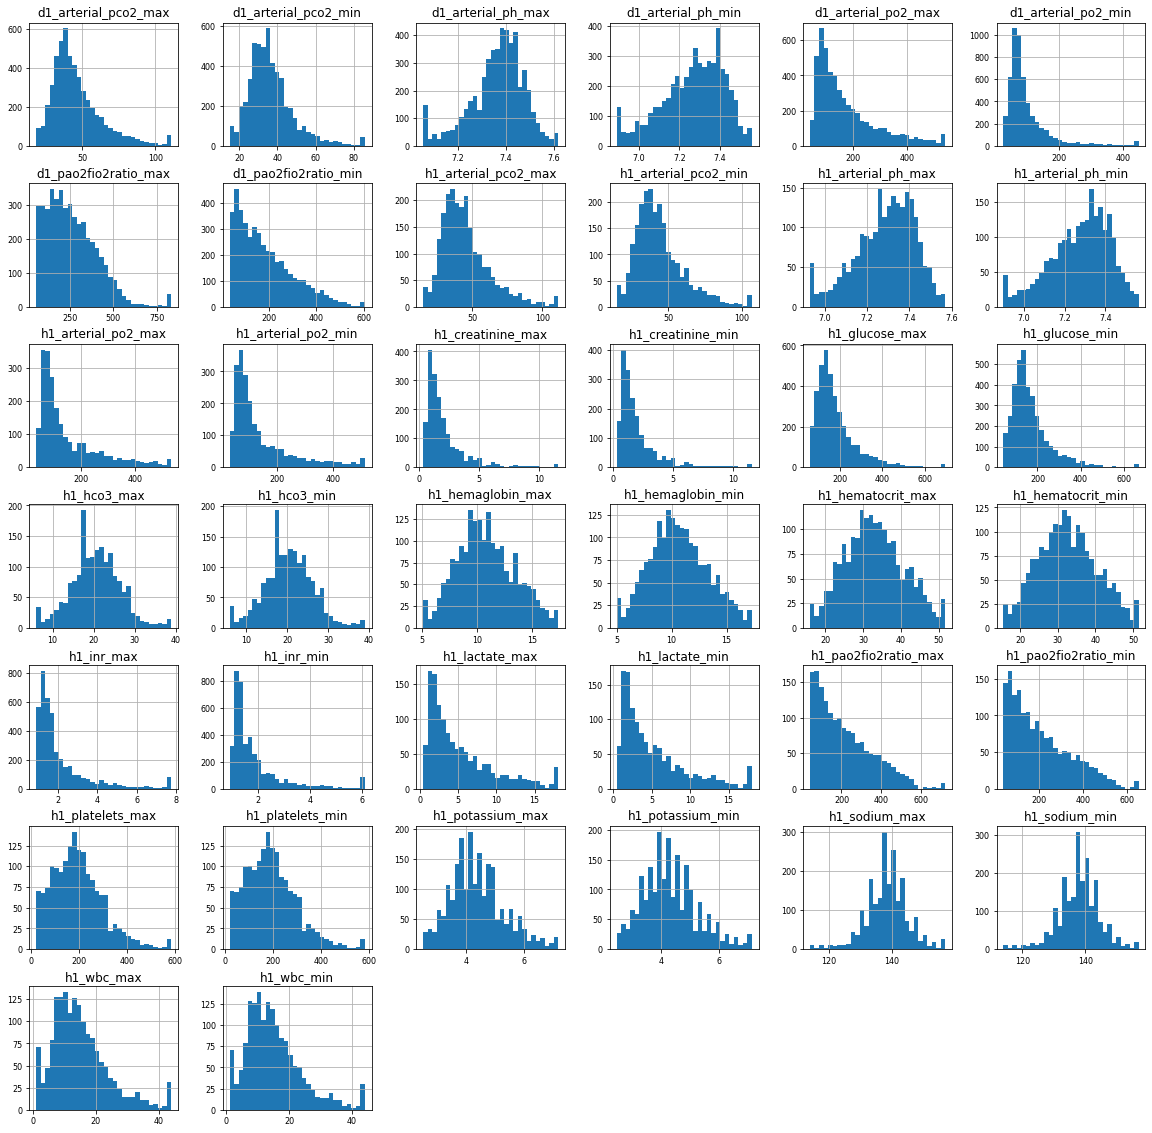

In [171]:
dead_wids[cols].hist(figsize=(20, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

##### Overall, I wouldn't impute by target variable since we do not have that variable in the test set, but there aren't many differences from the above anyway. I will continue imputing using median and mean, based on the list I had above.

In [173]:
# Simple imputing using plots above:

# Impute using median: h1_creatinine_max','h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_inr_max', 'h1_inr_min',
#        'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min',
#        'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 
#        'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 
#        'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 
#        'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min'
# Impute using mean: 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
#                  'h1_hematocrit_min','h1_sodium_max','h1_sodium_min'

In [174]:
def vv_imputation(df):
    mean_cols = ['h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
                 'h1_hematocrit_min','h1_sodium_max','h1_sodium_min']
    median_cols = ['h1_creatinine_max','h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_inr_max', 'h1_inr_min',
        'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min',
        'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 
        'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 
        'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 
        'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']
    for col in mean_cols:
        df[col].fillna((df[col].mean()), inplace=True)
    for col in median_cols:
        df[col].fillna((df[col].median()), inplace=True)

In [175]:
vv_imputation(h1_subset)

C:\Users\vamik\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [176]:
h1_subset.head()

,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,...,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
0,1.01,1.01,140.0,134.0,22.496696,22.421698,11.186665,11.038962,33.673673,33.223156,...,272.666667,205.000000,42.1,41.0,7.35,7.34,120.0,107.0,223.333333,214.0
1,0.56,0.56,145.0,143.0,27.000000,27.000000,11.300000,11.300000,36.900000,36.900000,...,54.800000,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.000000,51.0
2,1.01,1.01,140.0,134.0,22.496696,22.421698,11.186665,11.038962,33.673673,33.223156,...,272.666667,205.000000,42.1,41.0,7.35,7.34,120.0,107.0,223.333333,214.0
3,1.01,1.01,140.0,134.0,22.496696,22.421698,11.600000,11.600000,34.000000,34.000000,...,342.500000,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.000000,337.0
4,1.01,1.01,140.0,134.0,22.496696,22.421698,11.186665,11.038962,33.673673,33.223156,...,272.666667,205.000000,42.1,41.0,7.35,7.34,120.0,107.0,223.333333,214.0


In [177]:
null_values(h1_subset)

Dataframe has 38 columns.
There are 0 columns that have missing values.


,Missing Values,Percent of Total Values


### Clustering Original Data

In [178]:
test_subset = pd.get_dummies(h1_subset)

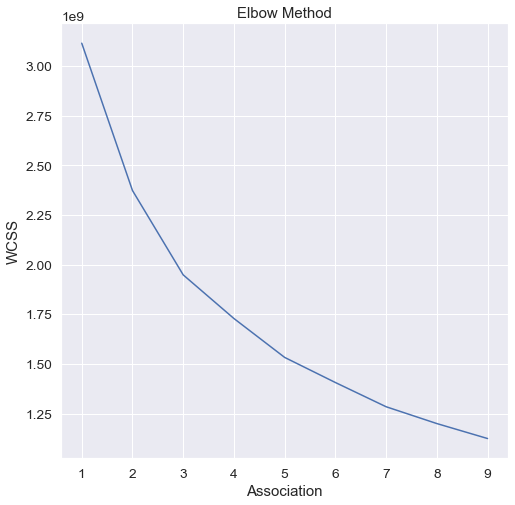

In [185]:
x = test_subset

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
#                 n_init = 10, random_state = 0)
# y_kmeans = kmeans.fit_predict(x)

# label = kmeans.labels_

# df = pd.DataFrame({'labels': label, 'species': species})
# ct = pd.crosstab(df['labels'], df['species'])
# print(ct)